In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stockcorr as sc 
from networkx.algorithms import community
import collective_weight_functions as cw

In [4]:
## Makes so that there is no output
%%capture

## Read in data
stock_df = pd.read_csv('../data/stock_market_data/stockdf.csv')


## Convert date to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])


## find first date of every year in the stockdf

first_date = stock_df['Date'].dt.year.drop_duplicates()

## split the stockdf into dataframes, one for each year

dataframes_ = [stock_df[stock_df['Date'].dt.year == year] for year in first_date]

corr_list = []
for i in dataframes_:
    curr_ = sc.get_corr_matrix(i, 0.9)
    ## make every value to 1 if above 0
    curr_ = np.where(curr_ > 0, 1, 0)
    corr_list.append(curr_)

## sum all correlation matrices in corr_list

total_sum = sum(corr_list)




0
1
2
3
4
5
6
7
8
9
10


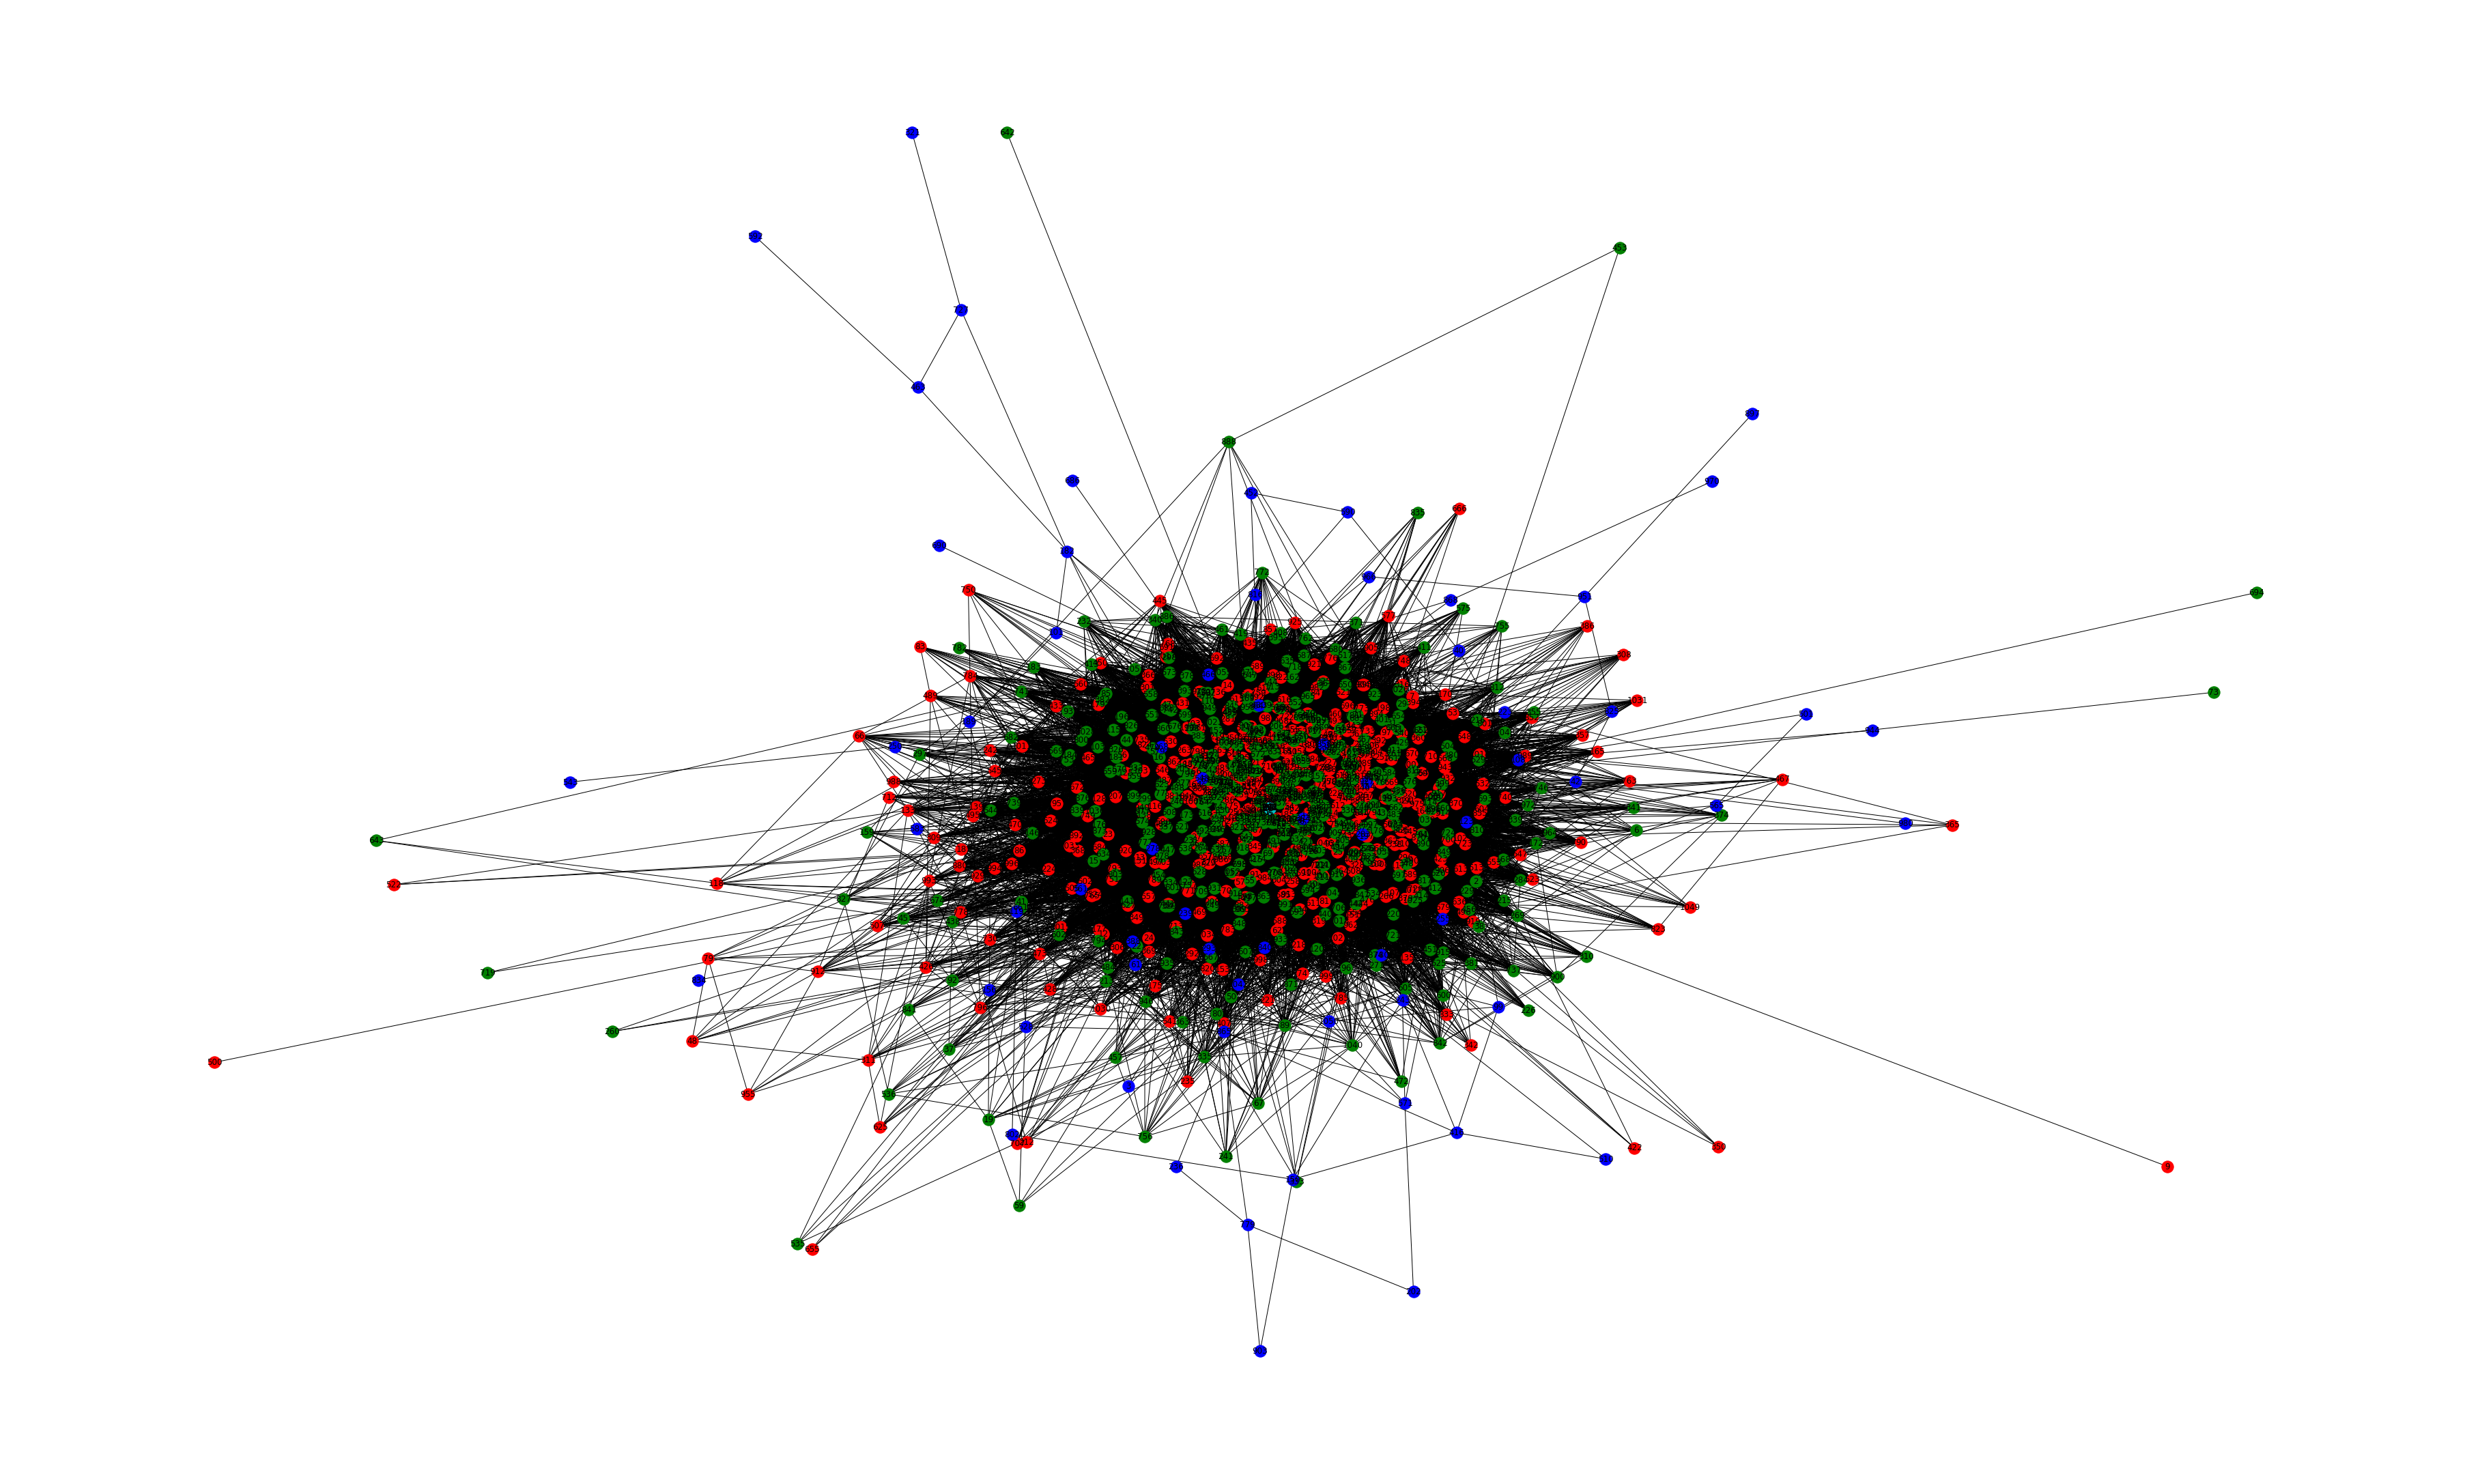

In [3]:
## create graph from total_sum with weighted edges
G = nx.from_numpy_matrix(total_sum)


communities = community.greedy_modularity_communities(G)
    #position by community
colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'brown', 'orange', 'purple' ]

setLst = list(communities)
plt.figure(figsize = (50,30))
for index, sg in enumerate(setLst):
    #draw with orange color text
    print(index)
    pos = nx.spring_layout(G.subgraph(sg))
    nx.draw(G.subgraph(sg), pos= pos, node_color= colorlist[index % 7], with_labels=True)
plt.show()


# G.remove_nodes_from(list(nx.isolates(G)))
# pos = nx.spring_layout(G)
# colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'brown', 'orange', 'purple' ]
# wcc = nx.connected_components( G )
# setLst = list(wcc) 
# len(setLst)
# plt.figure(figsize = (50,30))
# for index, sg in enumerate(setLst):
#     #draw with orange color text
#     nx.draw(G.subgraph(sg), pos= pos, node_color= colorlist[index % 7], with_labels=True, font_size=20)
# plt.show()

In [7]:
corr_, total_sum = cw.split_into_years()
corr_

calculating corr matrix
A has 884701 nan values
calculating corr matrix
A has 856541 nan values
calculating corr matrix
A has 829984 nan values
calculating corr matrix
A has 778072 nan values
calculating corr matrix
A has 709273 nan values
calculating corr matrix
A has 557527 nan values
calculating corr matrix
A has 512382 nan values
calculating corr matrix
A has 397991 nan values
calculating corr matrix
A has 285840 nan values
calculating corr matrix
A has 184634 nan values
calculating corr matrix
A has 120634 nan values
calculating corr matrix
A has 107794 nan values
calculating corr matrix
A has 121689 nan values
calculating corr matrix
A has 94235 nan values
calculating corr matrix
A has 124344 nan values
calculating corr matrix
A has 110027 nan values
calculating corr matrix
A has 64869 nan values
calculating corr matrix
A has 85581 nan values


[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
   